# Tutorial Objective: How to create a MultiExtension FITS Image/Data File?



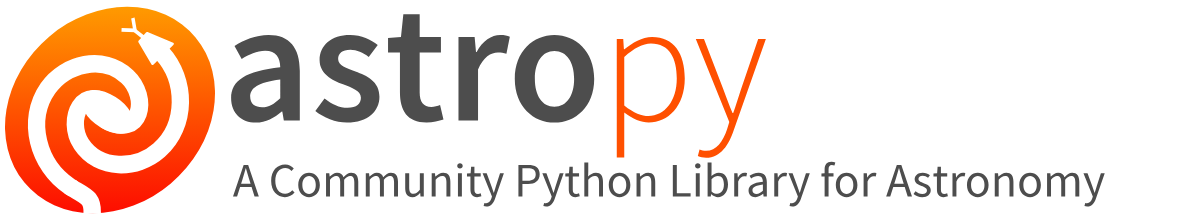, 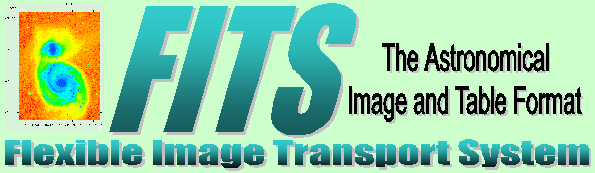,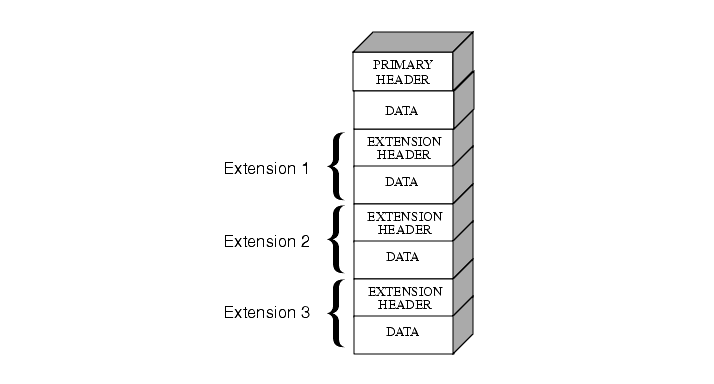


In [2]:
# import libraries
import numpy as np # create data and array
from astropy.io import fits # deals with fits file

In [45]:
# create data from multiple HDU extension

# this for primary HDU
data1=np.ones((5,5))
primary_hdu=fits.PrimaryHDU(data=np.ones((5,5)))

In [46]:
# create next extension1, image data
img_data=np.reshape(np.linspace(1,1000,1000),(20,50))
image_hdu=fits.ImageHDU(data=img_data,name='2D IMAGE')

In [47]:
# create extentsion2 , data cube
data_cube=np.reshape(np.linspace(1,1000,1000),(10,10,10))
cube_hdu=fits.ImageHDU(data=data_cube,name='3D IMAGE DATA')

In [48]:
# create extenstion 3rd HDU  , binary table data
c1=fits.Column(name='a',array=np.linspace(1,10,10),format='K')
c2=fits.Column(name='b',array=np.linspace(10,100,10),format='K')
c3=fits.Column(name='c',array=np.linspace(-10,-100,10),format='K')
tbl_hdu=fits.BinTableHDU.from_columns([c1,c2,c3])

In [49]:
file=fits.HDUList([primary_hdu,image_hdu,cube_hdu,tbl_hdu])


In [50]:
# get information about created fits file
file.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (5, 5)   float64   
  1  2D IMAGE      1 ImageHDU         8   (50, 20)   float64   
  2  3D IMAGE DATA    1 ImageHDU         9   (10, 10, 10)   float64   
  3                1 BinTableHDU     14   10R x 3C   ['K', 'K', 'K']   


In [51]:
# I will be creating header information regarding each HDU

In [52]:
hdr=fits.Header()
hdr['TELSCOPE']='JWST'
hdr['COMMENT']= 'This is primary hdu'

In [54]:
primary_hdu=fits.PrimaryHDU(data=data1,header=hdr)

In [ ]:
# update your hdu list

In [55]:
file=fits.HDUList([primary_hdu,image_hdu,cube_hdu,tbl_hdu])

In [57]:
file.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (5, 5)   float64   
  1  2D IMAGE      1 ImageHDU         8   (50, 20)   float64   
  2  3D IMAGE DATA    1 ImageHDU         9   (10, 10, 10)   float64   
  3                1 BinTableHDU     14   10R x 3C   ['K', 'K', 'K']   


In [58]:
file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    5                                                  
NAXIS2  =                    5                                                  
EXTEND  =                    T                                                  
TELSCOPE= 'JWST    '                                                            
COMMENT This is primary hdu                                                     

In [59]:
# I will be creating header information regarding IMAGE HDU

In [66]:
hdr_image=fits.Header()
hdr_image['TELSCOPE']='JWST'
hdr_image['COMMENT']= 'This is IMAGE hdu'
hdr_image['OBSERVER']= 'JYOTI PRAKASH'


In [67]:
image_hdu=fits.ImageHDU(data=img_data,header=hdr_image)

In [68]:
# update my whole hdu list
file=fits.HDUList([primary_hdu,image_hdu,cube_hdu,tbl_hdu])

In [69]:
file[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   50                                                  
NAXIS2  =                   20                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
TELSCOPE= 'JWST    '                                                            
OBSERVER= 'JYOTI PRAKASH'                                                       
COMMENT This is IMAGE hdu                                                       

In [70]:
# save all HDU into a single fits file
file.writeto('multi_extension_file.fits',overwrite=True)

In [71]:
# read saved file from 
my_file=fits.open('multi_extension_file.fits')

In [72]:
my_file.info()

Filename: multi_extension_file.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (5, 5)   float64   
  1                1 ImageHDU        10   (50, 20)   float64   
  2  3D IMAGE DATA    1 ImageHDU         9   (10, 10, 10)   float64   
  3                1 BinTableHDU     14   10R x 3C   [K, K, K]   


In [78]:
# extract data from each hdu
data_0=my_file[0].data
data_0, my_file[0].header

(array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype='>f8'),
 SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                  -64 / array data type                                
 NAXIS   =                    2 / number of array dimensions                     
 NAXIS1  =                    5                                                  
 NAXIS2  =                    5                                                  
 EXTEND  =                    T                                                  
 TELSCOPE= 'JWST    '                                                            
 COMMENT This is primary hdu                                                     )

In [77]:
data_1=my_file[1].data
data_1



array([[   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
          10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
          19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
          28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
          37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
          46.,   47.,   48.,   49.,   50.],
       [  51.,   52.,   53.,   54.,   55.,   56.,   57.,   58.,   59.,
          60.,   61.,   62.,   63.,   64.,   65.,   66.,   67.,   68.,
          69.,   70.,   71.,   72.,   73.,   74.,   75.,   76.,   77.,
          78.,   79.,   80.,   81.,   82.,   83.,   84.,   85.,   86.,
          87.,   88.,   89.,   90.,   91.,   92.,   93.,   94.,   95.,
          96.,   97.,   98.,   99.,  100.],
       [ 101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,
         110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,  118.,
         119.,  120.,  121.,  122.,  123.,  124.,  125.,  12